In [58]:
import pandas as pd
import calendar
from pandas import Series
import matplotlib.pyplot as plt
import math





df = pd.read_csv('ar_properties.csv')
df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,DyVXfkpKygVBKuUk5olH+A==,Propiedad,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,...,NaN,133139.0,NaN,NaN,NaN,Mensual,VENTA - Lote Industrial 130.000m2 - Parque Ind...,Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S ...,Lote,Venta
1,9naojilaMecJN4jlQiTkGg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,NaN,687.0,687.0,NaN,NaN,Mensual,Casa - Santa Cecilia,Conjunto edilicio de casa y departamentos en b...,Otro,Venta
2,tlCPRJPjoDEUzuuCelemAQ==,Propiedad,2020-08-22,2020-08-31,2020-08-22,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,...,1.0,80.0,80.0,NaN,NaN,Mensual,Casa - Concordia,"Casa de un dormitorio, cocina, baño, living co...",Casa,Alquiler
3,Zw3b91glQUO3HNrM5fPYlQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-27.494106,-55.123455,Argentina,Misiones,Oberá,...,1.0,NaN,NaN,NaN,NaN,Mensual,Terreno - Obera,IMPORTANTE PROPIEDAD EN VENTA EN OBERA MISIONE...,Lote,Venta
4,bsU81gm9JEgtZCbTYgvykg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-32.948856,-60.630464,Argentina,Santa Fe,Rosario,...,1.0,76.0,66.0,NaN,NaN,Mensual,Departamento - Rosario,PORTAL DE LOS MARINOS<br>Es un complejo de viv...,Departamento,Venta


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              894233 non-null   float64
 6   lon              894191 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               965273 non-null   object 
 10  l4               306162 non-null   object 
 11  l5               5530 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            714179 non-null   float64
 14  bedrooms         649933 non-null   float64
 15  bathrooms        765122 non-null   float64
 16  surface_total    47

### Nos quedamos con avisos de venta de departamentos en Capital Federal

In [60]:
# hay datos de 2020 y 2021
df_caba = df.loc[df['l2'] == 'Capital Federal']
df_caba = df_caba.loc[df['operation_type'] == 'Venta']
df_caba = df_caba.loc[df['property_type'] == 'Departamento']
df_caba = df_caba.loc[df['currency'] == 'USD']
df_caba['created_on'] = pd.to_datetime(df_caba['created_on'])
df_caba['year'] = df_caba['created_on'].map(lambda x:x.year)
df_caba['month'] = df_caba['created_on'].map(lambda x:x.month)
del df_caba['property_type']
df_caba.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,surface_total,surface_covered,price,currency,price_period,title,description,operation_type,year,month
163,U3qdJMKXnOJm0Y1tWpnnfg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.597364,-58.372987,Argentina,Capital Federal,Retiro,...,NaN,25.0,85000.0,USD,Mensual,Departamento - Capital Federal,"EXCELENTE DEPTO MUY LUMINOSO, <br><br>LAS MEDI...",Venta,2020,8
164,gsQB/JzLxaQdBLfNcm/DMw==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.600004,-58.417191,Argentina,Capital Federal,Almagro,...,38.0,31.0,110000.0,USD,Mensual,Monoambiente c/Cochera Fija Cubierta. Edif c/P...,Monoambiente de 38m² en muy buen estado con Am...,Venta,2020,8
165,SlPt6GJRjM+cO4rD3n3HFQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.581699,-58.433547,Argentina,Capital Federal,Palermo,...,35.0,30.0,105000.0,USD,Mensual,Oportunidad!!!!Palermo Hollywood Monoamb amobl...,RETASADO Venta Palermo Niceto Vega y Bonpland ...,Venta,2020,8
166,ZaH+6DXJ4MLM6QqZXhgWiw==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.595044,-58.442538,Argentina,Capital Federal,Palermo,...,51.0,46.0,150000.0,USD,Mensual,2 AMBIENTES CON COCHERA Y PARRILLA EN VILLA CR...,CONTACTO: 11- (LLAMADOS O WHATSAPP)<br><br>EXC...,Venta,2020,8
167,r7qrM5xaYo8QImSnqyKyYA==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.582549,-58.417350,Argentina,Capital Federal,Palermo,...,53.0,53.0,136500.0,USD,Mensual,2 AMB EN PALERMO,2 AMBIENTES CON 2 BALCÓNES PISO 8<br><br>Inmej...,Venta,2020,8


In [61]:
df_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131720 entries, 163 to 999978
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               131720 non-null  object        
 1   ad_type          131720 non-null  object        
 2   start_date       131720 non-null  object        
 3   end_date         131720 non-null  object        
 4   created_on       131720 non-null  datetime64[ns]
 5   lat              123428 non-null  float64       
 6   lon              123428 non-null  float64       
 7   l1               131720 non-null  object        
 8   l2               131720 non-null  object        
 9   l3               131209 non-null  object        
 10  l4               5914 non-null    object        
 11  l5               0 non-null       object        
 12  l6               0 non-null       float64       
 13  rooms            125620 non-null  float64       
 14  bedrooms         1

### Tranformación y limpieza datos

In [62]:
df_caba['created_on'] = pd.to_datetime(df_caba['created_on'])
df_caba['surface_total'].fillna((df_caba['surface_total'].mean()), inplace=True)
df_caba['surface_covered'].fillna((df_caba['surface_covered'].mean()), inplace=True)
df_caba['bedrooms'].fillna((df_caba['bedrooms'].mean()), inplace=True)
df_caba['rooms'].fillna((df_caba['rooms'].mean()), inplace=True)
# corren antes de "Transform & clean"
df_caba['price'].fillna((df_caba['price']), inplace=True)

df_caba['price'] = df_caba['price'].apply(lambda x: x/1000)

### Eliminando atributos que no son necesarios para el análisis

In [63]:
del df_caba['id']
del df_caba['description']
del df_caba['title']
del df_caba['price_period']
del df_caba['ad_type']
del df_caba['start_date']
del df_caba['end_date']
del df_caba['lat']
del df_caba['lon']
del df_caba['currency']
del df_caba['operation_type']

del df_caba['l1']
del df_caba['l2']
del df_caba['l6']
del df_caba['l5']
del df_caba['l4']


### Limpieza de datos

<AxesSubplot:>

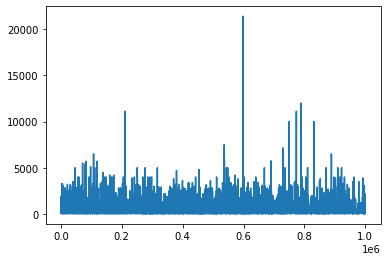

In [64]:
df_caba['price'].plot()

In [65]:
### nos quedamos con las propiedades que valen menos de 1millon de dolares
df_caba['price'] = df_caba['price'].loc[df_caba['price'] < 1000]

Text(0.5, 0, 'Precio en unidades miles de dolares')

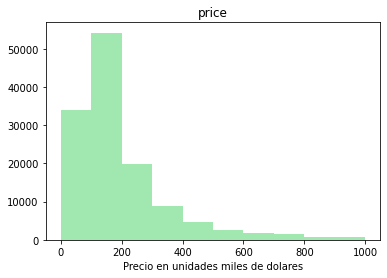

In [66]:
df_caba.hist(column='price',grid=False,bins=10,color='#A0E8AF')
plt.xlabel('Precio en unidades miles de dolares')

<AxesSubplot:xlabel='surface_covered'>

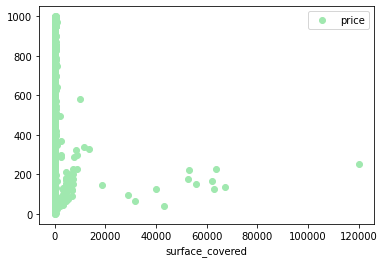

In [67]:
df_caba.plot(x='surface_covered', y='price', style='o',color='#A0E8AF')

<AxesSubplot:xlabel='surface_covered'>

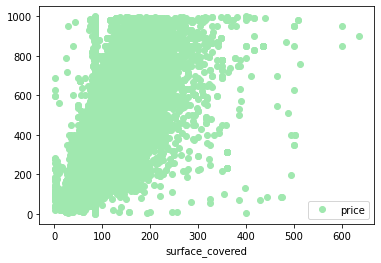

In [68]:
df_caba['surface_covered'] = df_caba['surface_covered'].loc[df_caba['surface_covered'] < 750]
df_caba.plot(x='surface_covered', y='price', style='o',color='#A0E8AF')

<AxesSubplot:xlabel='surface_covered'>

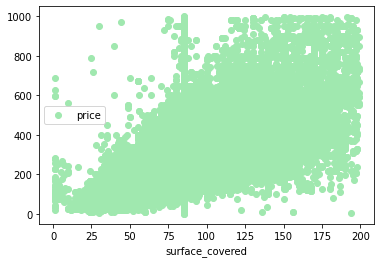

In [69]:
df_caba_with_surface_covered_less_than_200 = df_caba.loc[df_caba['surface_covered'] < 200]


df_caba_with_surface_covered_less_than_200.plot(x='surface_covered', y='price', style='o',color='#A0E8AF')

<AxesSubplot:xlabel='surface_covered'>

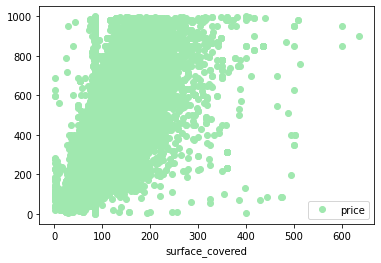

In [70]:
df_caba.plot(x='surface_covered', y='price', style='o',color='#A0E8AF')

### algunas comparativas

### Distribuciones de las clases

### ¿Cómo influye la comuna en el precio por m2?

In [71]:
df_caba["price_usd_per_m2"] = df_caba["price"] / df_caba["surface_total"]

In [72]:
def getComunaByBarrio(x):
    comuna1 = ['Retiro','San Nicolás','Puerto Madero','San Telmo','Montserrat', 'Constitución']
    comuna2 = ['Recoleta']
    comuna3 = ['Balvanera','San Cristóbal']
    comuna4 = ['La Boca', 'Barracas', 'Parque Patricios', 'Nueva Pompeya']
    comuna5 = ['Almagro', 'Boedo']
    comuna6 = ['Caballito']
    comuna7 = ['Flores','Parque Chacabuco']
    comuna8 = ['Villa Soldati', 'Villa Riachuelo', 'Villa Lugano']
    comuna9 = ['Liniers', 'Mataderos', 'Parque Avellaneda']
    comuna10 = ['Villa Real', 'Monte Castro', 'Versalles', 'Floresta','Vélez Sarsfield','Villa Luro']
    comuna11 = ['Villa General Mitre', 'Villa Devoto', 'Villa del Parque', 'Villa Santa Rita']
    comuna12 = ['Coghlan', 'Saavedra', 'Villa Urquiza','Villa Pueyrredón']
    comuna13 = ['Núñez', 'Belgrano', 'Colegiales']
    comuna14 = ['Palermo']
    comuna15 = ['Chacarita', 'Villa Crespo', 'La Paternal','Villa Ortúzar', 'Agronomía', 'Parque Chas']
    
    if x in comuna1:
        return 'COMUNA 1'
    elif x in comuna2:
        return 'COMUNA 2'
    elif x in comuna3:
        return 'COMUNA 3'
    elif x in comuna4:
        return 'COMUNA 4'
    elif x in comuna5:
        return 'COMUNA 5'
    elif x in comuna6:
        return 'COMUNA 6'
    elif x in comuna7:
        return 'COMUNA 7'
    elif x in comuna8:
        return 'COMUNA 8'
    elif x in comuna9:
        return 'COMUNA 9'
    elif x in comuna10:
        return 'COMUNA 10'
    elif x in comuna11:
        return 'COMUNA 11'
    elif x in comuna12:
        return 'COMUNA 12'
    elif x in comuna13:
        return 'COMUNA 13'
    elif x in comuna14:
        return 'COMUNA 14'
    elif x in comuna15:
        return 'COMUNA 15'


df_caba['comuna'] = df_caba['l3'].apply(getComunaByBarrio)
df_caba['comuna'].describe

<bound method NDFrame.describe of 163        COMUNA 1
164        COMUNA 5
165       COMUNA 14
166       COMUNA 14
167       COMUNA 14
            ...    
999928     COMUNA 3
999931         None
999932         None
999977    COMUNA 14
999978    COMUNA 13
Name: comuna, Length: 131720, dtype: object>

### Cantidad de avisos por comuna

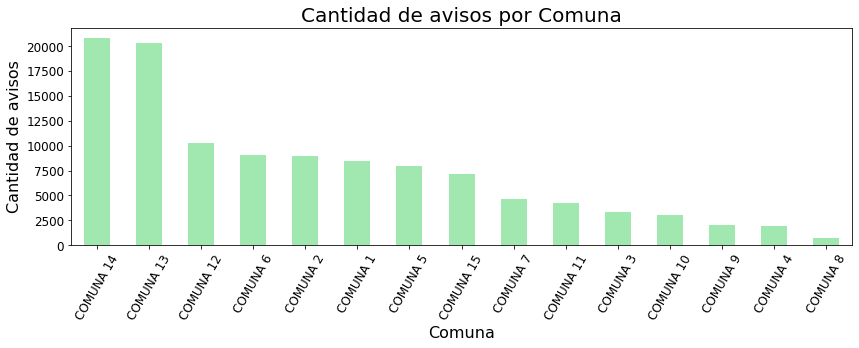

In [73]:
df_caba['comuna'].value_counts().head(15).plot(kind='bar',rot=60, figsize=(14,4), color='#A0E8AF' ,fontsize=12);
plt.title('Cantidad de avisos por Comuna', fontsize=20);
plt.xlabel('Comuna', fontsize=16);
plt.ylabel('Cantidad de avisos', fontsize=16);

In [74]:
def get_comuna_price_m2(df, num, cheapest):
    return df.groupby(['comuna'])['price_usd_per_m2'].mean().sort_values(ascending=cheapest).head(num)
    
def plot_comuna_price_m2(df, num, cheapest,colour,title):
    graph = get_comuna_price_m2(df, num, cheapest).sort_values().plot.barh(figsize=(15,5),color='#A0E8AF',fontsize=12)
    graph.set_title(title, fontsize=20)
    graph.set_ylabel("Comuna", fontsize=16)
    graph.set_xlabel("1000 USD/m2", fontsize=16)
    plt.show()

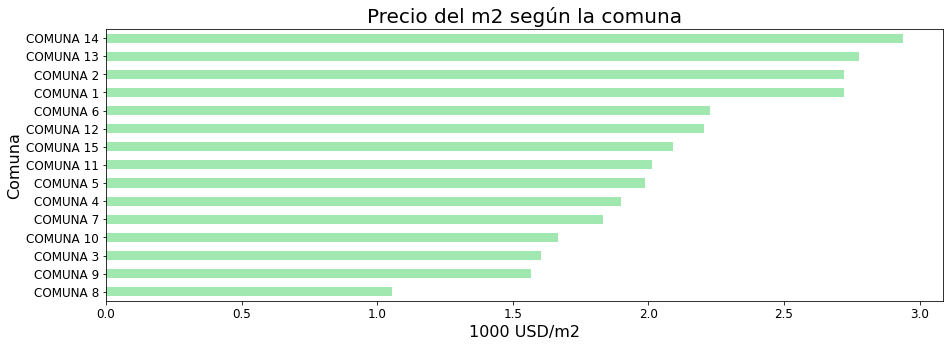

In [75]:
cantidad_comunas_a_mostrar = 15
plot_comuna_price_m2(df_caba,cantidad_comunas_a_mostrar, False,'blue',"Precio del m2 según la comuna")

AttributeError: 'Rectangle' object has no property 'lineWidth'

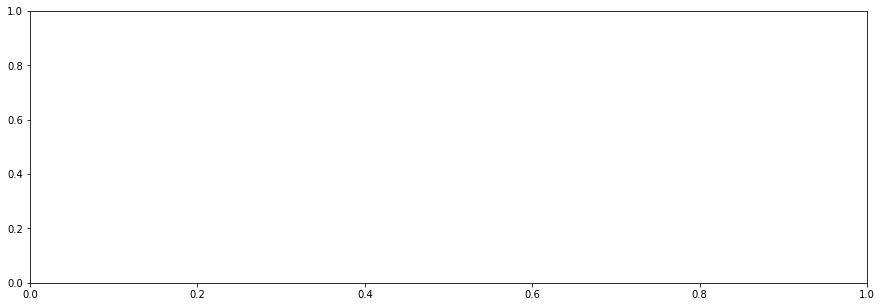

In [76]:
def get_comuna_price_m2(df, num, cheapest):
    return df.groupby(['comuna'])['price_usd_per_m2'].mean().sort_values(ascending=cheapest).head(num)

top5_cheap_CABA = get_comuna_price_m2(df_caba,5, True)

graph = top5_cheap_CABA.sort_values().plot.barh(figsize=(15,5),color='blue',edgecolor='#A0E8AF',lineWidth = 1.5,fontsize=15)
graph.set_title("Las 5 comunas más económicas por m2", fontsize=20)
graph.set_ylabel("Comuna", fontsize=18)
graph.set_xlabel("USD/m2", fontsize=18)
plt.show()

### relación de comuna y la cantidad de ambientes

In [77]:
import matplotlib.pyplot as plt
def get_comuna_rooms(df, num, cheapest):
    return df.groupby(['comuna'])['rooms'].mean().sort_values(ascending=cheapest).head(num)
    
def plot_comuna_rooms(df, num, cheapest,colour,title):
    graph = get_comuna_rooms(df, num, cheapest).sort_values().plot.barh(figsize=(15,5),color='#A0E8AF',fontsize=12)
    graph.set_title(title, fontsize=20)
    graph.set_ylabel("Comuna", fontsize=15)
    graph.set_xlabel("ambientes", fontsize=15)
    plt.show()

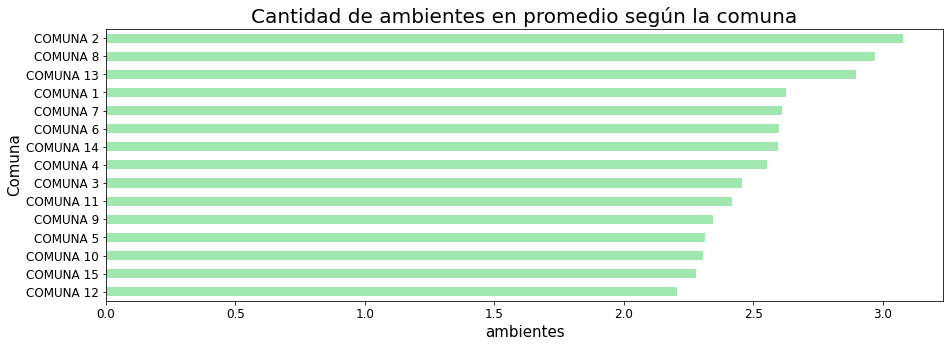

In [78]:
cantidad_comunas_a_mostrar = 15
plot_comuna_rooms(df_caba,cantidad_comunas_a_mostrar, False,'darkred',"Cantidad de ambientes en promedio según la comuna")

### relación de comuna y la superficie total

In [79]:
import matplotlib.pyplot as plt
def get_comuna_superficie(df, num, cheapest):
    return df.groupby(['comuna'])['surface_total'].mean().sort_values(ascending=cheapest).head(num)
    
def plot_comuna_superficie(df, num, cheapest,colour,title):
    graph = get_comuna_superficie(df, num, cheapest).sort_values().plot.barh(figsize=(15,5),color='#A0E8AF',fontsize=12)
    graph.set_title(title, fontsize=20)
    graph.set_ylabel("Comuna", fontsize=16)
    graph.set_xlabel("surface_total", fontsize=16)
    plt.show()

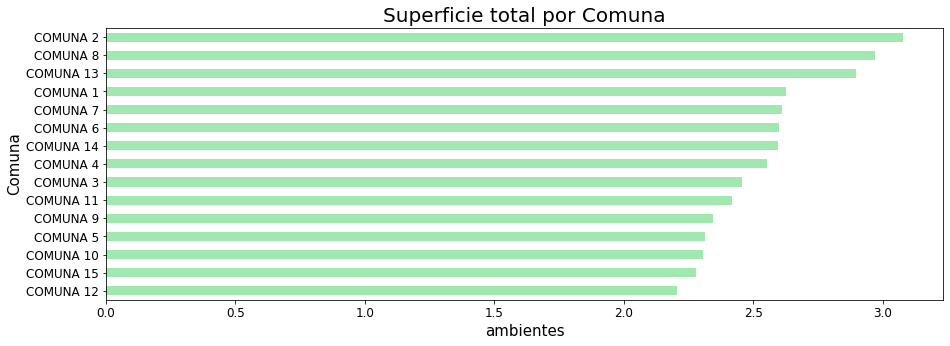

In [80]:
plot_comuna_rooms(df_caba,15, False,'blue',"Superficie total por Comuna")

### Discretización de price

In [81]:
df_caba['price'] = df_caba['price'].loc[df_caba['price'] > 1]
df_caba['price'].describe()

count    128568.000000
mean        196.472106
std         155.340736
min           5.000000
25%          98.000000
50%         145.000000
75%         235.000000
max         999.999000
Name: price, dtype: float64

<AxesSubplot:>

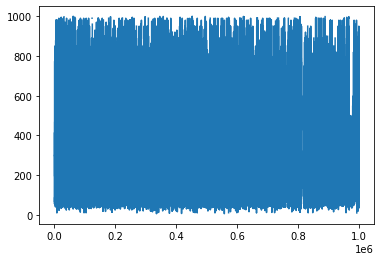

In [82]:
df_caba['price'].plot()

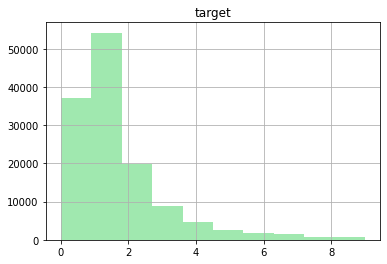

In [83]:
import math

def map_price(x):
    isNan = math.isnan(x)
    x = 0 if isNan else int(x)
    if x < 100:
        return 0
    if x < 200:
        return 1
    if x < 300:
        return 2
    if x < 400:
        return 3
    if x < 500:
        return 4
    if x < 600:
        return 5
    if x < 700:
        return 6
    if x < 800:
        return 7
    if x < 900:
        return 8
    return 9


df_caba['target'] = df_caba['price'].map(map_price)
df_caba.hist(column='target',color='#A0E8AF')
df_caba.to_csv('cleaned_data_caba_SOM.csv', index=False)

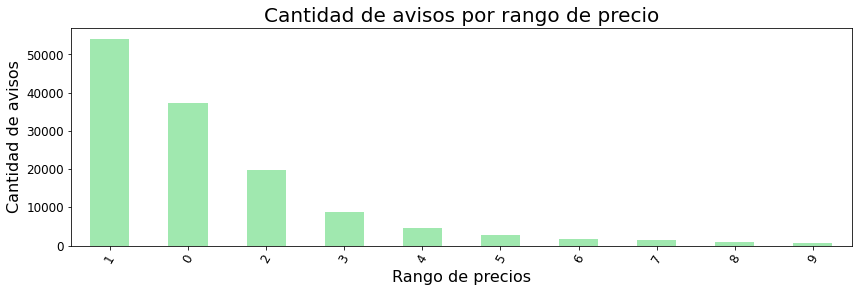

In [84]:
df_caba['target'].value_counts().head(15).plot(kind='bar',rot=60, figsize=(14,4), color='#A0E8AF' ,fontsize=12);
plt.title('Cantidad de avisos por rango de precio', fontsize=20);
plt.xlabel('Rango de precios', fontsize=16);
plt.ylabel('Cantidad de avisos', fontsize=16);

Se puede observar que la mayor cantidad de avisos son para los departamentos que tienen un precio menor a 200.000 Usd

<AxesSubplot:xlabel='target'>

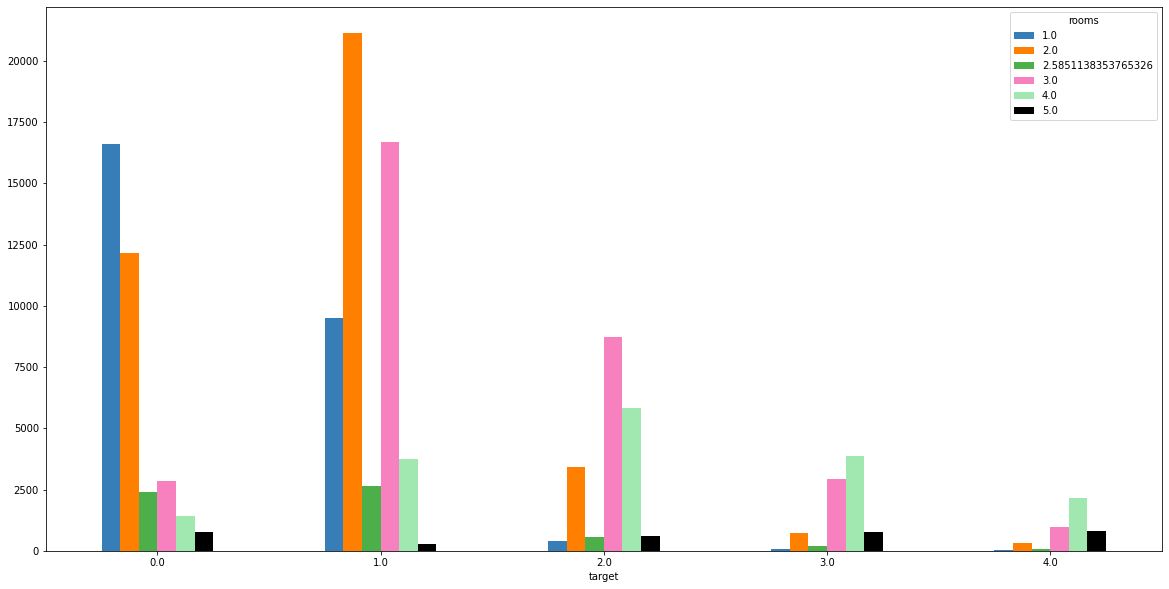

In [107]:
df_caba['rooms'] = df_caba['rooms'].loc[df_caba['rooms'] < 6]
df_caba['target'] = df_caba['target'].loc[df_caba['target'] < 5]




CrosstabResult=pd.crosstab(index=df_caba['target'],columns=df_caba['rooms'])
CrosstabResult.plot.bar(rot=0,figsize=(20,10), color=['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#A0E8AF', 'black'])

<AxesSubplot:xlabel='comuna'>

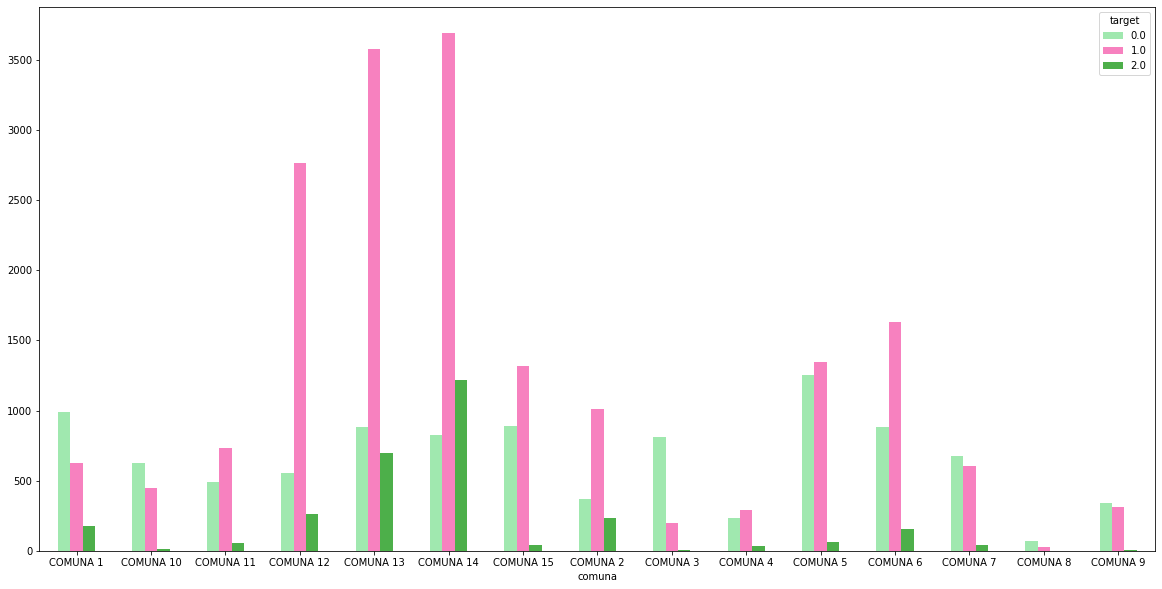

In [121]:
df_caba_two_rooms = df_caba.loc[df_caba['rooms'] == 2]
df_caba_two_rooms = df_caba_two_rooms.loc[df_caba_two_rooms['target'] < 3]



CrosstabResult=pd.crosstab(index=df_caba_two_rooms['comuna'],columns=df_caba_two_rooms['target'])
CrosstabResult.plot.bar(rot=0,figsize=(20,10), color=['#A0E8AF', '#f781bf', '#4daf4a',
                  '#f781bf', '#A0E8AF', 'black', 'blue','green','orange'])



In [125]:
df_caba_two_rooms.groupby(['comuna', 'target']).size().unstack(fill_value=0)


target,0.0,1.0,2.0
comuna,,,
COMUNA 1,993,626,175
COMUNA 10,627,450,13
COMUNA 11,492,731,53
COMUNA 12,552,2763,262
COMUNA 13,883,3581,695
COMUNA 14,824,3692,1215
COMUNA 15,890,1317,42
COMUNA 2,367,1012,237
COMUNA 3,814,196,4


<AxesSubplot:xlabel='comuna'>

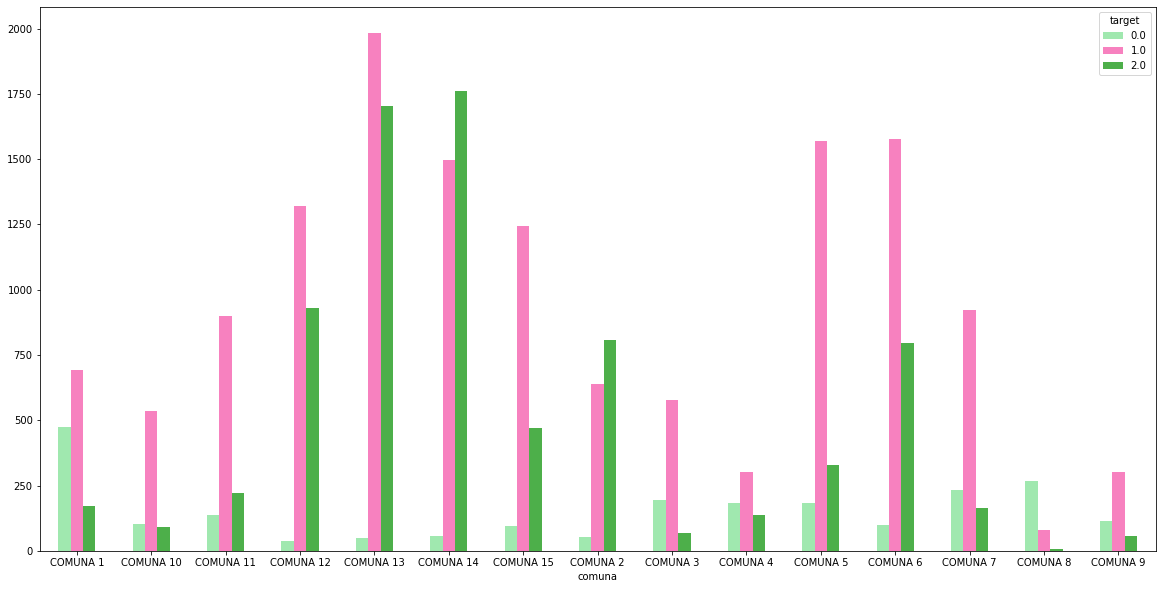

In [123]:
df_caba_three_rooms = df_caba.loc[df_caba['rooms'] == 3]
df_caba_three_rooms = df_caba_three_rooms.loc[df_caba_three_rooms['target'] < 3]



CrosstabResult=pd.crosstab(index=df_caba_three_rooms['comuna'],columns=df_caba_three_rooms['target'])
CrosstabResult.plot.bar(rot=0,figsize=(20,10), color=['#A0E8AF', '#f781bf', '#4daf4a',
                  '#f781bf', '#A0E8AF', 'black'])

### Discretización para gráfico som

In [40]:

df_tpfinal_som = pd.read_csv('cleaned_data_caba_SOM.csv')
df_tpfinal_som.head()

,created_on,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,year,month,price_usd_per_m2,COMUNA,target
0,2020-08-22,Retiro,2.585114,1.825512,NaN,105.154784,25.0,85.0,2020,8,0.808332,COMUNA 1,0
1,2020-08-22,Almagro,1.000000,1.825512,1.0,38.000000,31.0,110.0,2020,8,2.894737,COMUNA 5,1
2,2020-08-22,Palermo,1.000000,1.825512,1.0,35.000000,30.0,105.0,2020,8,3.000000,COMUNA 14,1
3,2020-08-22,Palermo,2.000000,1.825512,1.0,51.000000,46.0,150.0,2020,8,2.941176,COMUNA 14,1
4,2020-08-22,Palermo,2.000000,1.825512,1.0,53.000000,53.0,136.5,2020,8,2.575472,COMUNA 14,1


discretizamos la comuna

In [41]:
def discretizar_comuna(x):
    if x == 'COMUNA 1':
        return 1
    elif x == 'COMUNA 2':
        return 2
    elif x == 'COMUNA 3':
        return 3
    elif x == 'COMUNA 4':
        return 4
    elif x == 'COMUNA 5':
        return 5
    elif x == 'COMUNA 6':
        return 6
    elif x == 'COMUNA 7':
        return 7
    elif x == 'COMUNA 8':
        return 8
    elif x == 'COMUNA 9':
        return 9
    elif x == 'COMUNA 10':
        return 10
    elif x == 'COMUNA 11':
        return 11
    elif x == 'COMUNA 12':
        return 12
    elif x == 'COMUNA 13':
        return 13
    elif x == 'COMUNA 14':
        return 14
    elif x == 'COMUNA 15':
        return 15
    

In [42]:
df_tpfinal_som['COMUNA'] = df_tpfinal_som['COMUNA'].apply(discretizar_comuna)
df_tpfinal_som.head()

,created_on,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,year,month,price_usd_per_m2,COMUNA,target
0,2020-08-22,Retiro,2.585114,1.825512,NaN,105.154784,25.0,85.0,2020,8,0.808332,1.0,0
1,2020-08-22,Almagro,1.000000,1.825512,1.0,38.000000,31.0,110.0,2020,8,2.894737,5.0,1
2,2020-08-22,Palermo,1.000000,1.825512,1.0,35.000000,30.0,105.0,2020,8,3.000000,14.0,1
3,2020-08-22,Palermo,2.000000,1.825512,1.0,51.000000,46.0,150.0,2020,8,2.941176,14.0,1
4,2020-08-22,Palermo,2.000000,1.825512,1.0,53.000000,53.0,136.5,2020,8,2.575472,14.0,1


Discretizamos rooms

<AxesSubplot:>

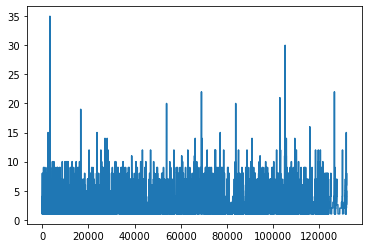

In [43]:
df_tpfinal_som['rooms'].plot()

In [44]:
def map_rooms(x):
    isNan = math.isnan(x)
    x = 0 if isNan else int(x)
    if x < 2:
        return 0
    if x < 4:
        return 1
    if x < 6:
        return 2
    if x < 8:
        return 3
    if x < 10:
        return 4
    if x < 12:
        return 5
    if x < 14:
        return 6
    if x < 16:
        return 7
    if x < 18:
        return 8
    return 9

In [45]:
df_tpfinal_som['rooms'] = df_tpfinal_som['rooms'].apply(map_rooms)
df_tpfinal_som.head()

,created_on,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,year,month,price_usd_per_m2,COMUNA,target
0,2020-08-22,Retiro,1,1.825512,NaN,105.154784,25.0,85.0,2020,8,0.808332,1.0,0
1,2020-08-22,Almagro,0,1.825512,1.0,38.000000,31.0,110.0,2020,8,2.894737,5.0,1
2,2020-08-22,Palermo,0,1.825512,1.0,35.000000,30.0,105.0,2020,8,3.000000,14.0,1
3,2020-08-22,Palermo,1,1.825512,1.0,51.000000,46.0,150.0,2020,8,2.941176,14.0,1
4,2020-08-22,Palermo,1,1.825512,1.0,53.000000,53.0,136.5,2020,8,2.575472,14.0,1


discretizamos bedrooms

<AxesSubplot:>

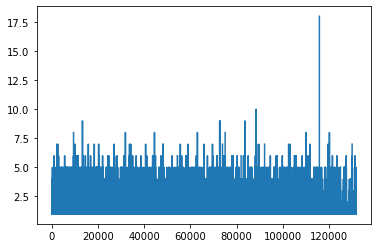

In [46]:
df_tpfinal_som['bathrooms'].plot()

In [47]:
def map_bathrooms(x):
    isNan = math.isnan(x)
    x = 0 if isNan else int(x)
    if x < 1:
        return 0
    if x < 2:
        return 1
    if x < 3:
        return 2
    if x < 4:
        return 3
    if x < 5:
        return 4
    if x < 6:
        return 5
    if x < 7:
        return 6
    if x < 8:
        return 7
    if x < 9:
        return 8
    return 9

In [48]:
df_tpfinal_som['bathrooms'] = df_tpfinal_som['bathrooms'].apply(map_bathrooms)
df_tpfinal_som.head()

,created_on,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,year,month,price_usd_per_m2,COMUNA,target
0,2020-08-22,Retiro,1,1.825512,0,105.154784,25.0,85.0,2020,8,0.808332,1.0,0
1,2020-08-22,Almagro,0,1.825512,1,38.000000,31.0,110.0,2020,8,2.894737,5.0,1
2,2020-08-22,Palermo,0,1.825512,1,35.000000,30.0,105.0,2020,8,3.000000,14.0,1
3,2020-08-22,Palermo,1,1.825512,1,51.000000,46.0,150.0,2020,8,2.941176,14.0,1
4,2020-08-22,Palermo,1,1.825512,1,53.000000,53.0,136.5,2020,8,2.575472,14.0,1


Discretizamos bedrooms

<AxesSubplot:>

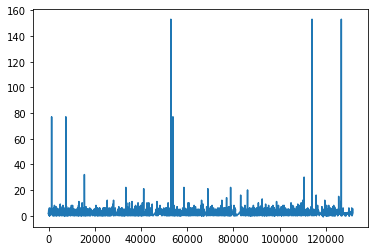

In [49]:
df_tpfinal_som['bedrooms'].plot()

<AxesSubplot:>

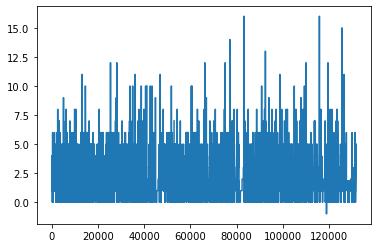

In [50]:
df_tpfinal_som['bedrooms'] = df_tpfinal_som['bedrooms'].loc[df_tpfinal_som['bedrooms'] < 20]
df_tpfinal_som['bedrooms'].plot()

In [51]:
def map_bedrooms(x):
    isNan = math.isnan(x)
    x = 0 if isNan else int(x)
    if x < 2:
        return 0
    if x < 4:
        return 1
    if x < 6:
        return 2
    if x < 8:
        return 3
    if x < 10:
        return 4
    if x < 12:
        return 5
    if x < 14:
        return 6
    if x < 16:
        return 7
    if x < 18:
        return 8
    return 9

In [52]:
df_tpfinal_som['bedrooms'] = df_tpfinal_som['bedrooms'].apply(map_bedrooms)
df_tpfinal_som.head()

,created_on,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,year,month,price_usd_per_m2,COMUNA,target
0,2020-08-22,Retiro,1,0,0,105.154784,25.0,85.0,2020,8,0.808332,1.0,0
1,2020-08-22,Almagro,0,0,1,38.000000,31.0,110.0,2020,8,2.894737,5.0,1
2,2020-08-22,Palermo,0,0,1,35.000000,30.0,105.0,2020,8,3.000000,14.0,1
3,2020-08-22,Palermo,1,0,1,51.000000,46.0,150.0,2020,8,2.941176,14.0,1
4,2020-08-22,Palermo,1,0,1,53.000000,53.0,136.5,2020,8,2.575472,14.0,1


Discretizamos surface_total

<AxesSubplot:>

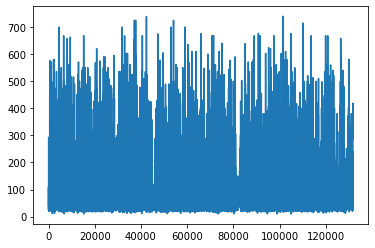

In [53]:
df_tpfinal_som['surface_total'].plot()

In [54]:
def map_surface_total(x):
    isNan = math.isnan(x)
    x = 0 if isNan else int(x)
    if x < 100:
        return 0
    if x < 200:
        return 1
    if x < 300:
        return 2
    if x < 400:
        return 3
    if x < 500:
        return 4
    if x < 600:
        return 5
    if x < 700:
        return 6
    if x < 800:
        return 7
    if x < 900:
        return 8
    return 9

In [55]:
df_tpfinal_som['surface_total'] = df_tpfinal_som['surface_total'].apply(map_surface_total)
df_tpfinal_som.head()

,created_on,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,year,month,price_usd_per_m2,COMUNA,target
0,2020-08-22,Retiro,1,0,0,1,25.0,85.0,2020,8,0.808332,1.0,0
1,2020-08-22,Almagro,0,0,1,0,31.0,110.0,2020,8,2.894737,5.0,1
2,2020-08-22,Palermo,0,0,1,0,30.0,105.0,2020,8,3.000000,14.0,1
3,2020-08-22,Palermo,1,0,1,0,46.0,150.0,2020,8,2.941176,14.0,1
4,2020-08-22,Palermo,1,0,1,0,53.0,136.5,2020,8,2.575472,14.0,1


Discretizamos surface_covered

<AxesSubplot:>

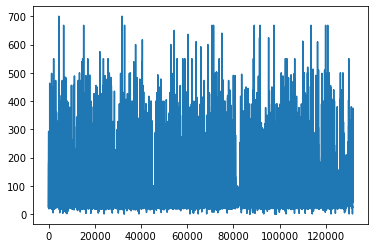

In [56]:
df_tpfinal_som['surface_covered'].plot()

In [57]:
df_tpfinal_som['surface_covered'] = df_tpfinal_som['surface_covered'].apply(map_surface_total)
df_tpfinal_som.head()

,created_on,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,year,month,price_usd_per_m2,COMUNA,target
0,2020-08-22,Retiro,1,0,0,1,0,85.0,2020,8,0.808332,1.0,0
1,2020-08-22,Almagro,0,0,1,0,0,110.0,2020,8,2.894737,5.0,1
2,2020-08-22,Palermo,0,0,1,0,0,105.0,2020,8,3.000000,14.0,1
3,2020-08-22,Palermo,1,0,1,0,0,150.0,2020,8,2.941176,14.0,1
4,2020-08-22,Palermo,1,0,1,0,0,136.5,2020,8,2.575472,14.0,1


In [58]:
del df_tpfinal_som['l3']
del df_tpfinal_som['created_on']
del df_tpfinal_som['year']
del df_tpfinal_som['month']
del df_tpfinal_som['price_usd_per_m2']

In [59]:
df_tpfinal_som.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,COMUNA,target
0,1,0,0,1,0,85.0,1.0,0
1,0,0,1,0,0,110.0,5.0,1
2,0,0,1,0,0,105.0,14.0,1
3,1,0,1,0,0,150.0,14.0,1
4,1,0,1,0,0,136.5,14.0,1


In [60]:
df_tpfinal_som.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131720 entries, 0 to 131719
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rooms            131720 non-null  int64  
 1   bedrooms         131720 non-null  int64  
 2   bathrooms        131720 non-null  int64  
 3   surface_total    131720 non-null  int64  
 4   surface_covered  131720 non-null  int64  
 5   price            128568 non-null  float64
 6   COMUNA           112841 non-null  float64
 7   target           131720 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 8.0 MB


In [61]:
df_tpfinal_som.to_csv('data_caba_to_SOM.csv', index=False)

In [62]:
df_tpfinal_som.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,COMUNA,target
0,1,0,0,1,0,85.0,1.0,0
1,0,0,1,0,0,110.0,5.0,1
2,0,0,1,0,0,105.0,14.0,1
3,1,0,1,0,0,150.0,14.0,1
4,1,0,1,0,0,136.5,14.0,1
